In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv("dataset/Cleaned_CreditCard_data.csv")

In [3]:
#top 5 records of dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Shape of dataset
df.shape

(30000, 14)

In [5]:
#Checking duplicated values in dataset
df.duplicated().sum()

35

In [6]:
##Dropping duplicated values from dataset
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
#Checking missing values in dataset
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
BILL_AMT1    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Payment      0
dtype: int64

In [9]:
#There is no  missing values in dataset

In [10]:
#Columns of dataset
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Payment'],
      dtype='object')

In [12]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
df.shape

(29965, 14)

In [14]:
df['Payment'].value_counts(normalize= True)

Payment
0    0.778742
1    0.221258
Name: proportion, dtype: float64

In [15]:
#The dataset is imbalaned.

In [17]:
#Independent variable and dependent variable 
X = df.drop("Payment", axis= 1)
y = df['Payment']

In [18]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [19]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Payment, dtype: int64

In [20]:
X.shape, y.shape

((29965, 13), (29965,))

In [21]:
#Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [22]:
x_train.shape, x_test.shape

((20975, 13), (8990, 13))

In [23]:
y_train.shape, y_test.shape

((20975,), (8990,))

In [24]:
#Scaling features 
scaler = StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### RandomOverSampling Technique
 - Here we wil use randomoversample method for imbalanced dataset.

In [27]:
from imblearn.over_sampling import RandomOverSampler 
os = RandomOverSampler()

In [28]:
x_train_os, y_train_os = os.fit_resample(x_train, y_train)

In [29]:
from collections import Counter 

print("The number of classes before fits: {}".format(Counter(y_train)))
print("The number of classes after fits: {}".format(Counter(y_train_os)))

The number of classes before fits: Counter({0: 16357, 1: 4618})
The number of classes after fits: Counter({1: 16357, 0: 16357})


### Model Evaluation

In [30]:
#Creating an evalute function for all the metrics after model training 
def evaluate_model(true,predicted):
  score= accuracy_score(true, predicted)
  cm= confusion_matrix(true, predicted)
  report= classification_report(true, predicted)
  return score, cm, report

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(), 
    "XGBoost Classifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}


model_list = []
scores =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_os, y_train_os) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_os)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_score , model_train_cm, model_train_report = evaluate_model(y_train_os, y_train_pred)

    model_test_score , model_test_cm, model_test_report = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_score))
    print("- Confusion Matrix: \n",model_train_cm)
    print("- Classification Report: \n",model_train_report)

    print('='*40)
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_score))
    print("- Confusion Matrix: \n",model_test_cm)
    print("- Classification Report: \n",model_test_report)

    scores.append(model_test_score)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy Score: 0.6723
- Confusion Matrix: 
 [[11548  4809]
 [ 5910 10447]]
- Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68     16357
           1       0.68      0.64      0.66     16357

    accuracy                           0.67     32714
   macro avg       0.67      0.67      0.67     32714
weighted avg       0.67      0.67      0.67     32714

Model performance for Test set
- Accuracy Score: 0.6911
- Confusion Matrix: 
 [[4979 1999]
 [ 778 1234]]
- Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      6978
           1       0.38      0.61      0.47      2012

    accuracy                           0.69      8990
   macro avg       0.62      0.66      0.63      8990
weighted avg       0.76      0.69      0.71      8990



K-Neighbors Classifier
Model performance for Trainin

### Results

In [32]:
pd.DataFrame(list(zip(model_list, scores)), columns=['Model Name', 'Scores']).sort_values(by=["Scores"],ascending=False)

,Model Name,Scores
3,Random Forest Classifier,0.812347
2,Support Vector Machine,0.766630
5,XGBoost Classifier,0.757508
6,AdaBoost Classifier,0.747164
4,Decision Tree Classifier,0.729700
0,Logistic Regression,0.691101
1,K-Neighbors Classifier,0.670523


In [33]:
#RandomForest Classifier gives good accuracy than other models 

### Hyperparameter Tunning

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 70, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 147, 194, 242, 289, 336, 384, 431, 478, 526, 573, 621, 668, 715, 763, 810, 857, 905, 952, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 17, 35, 52, 70, None], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
#RandomForest Classifier
forest= RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 30, cv = 3, 
                               scoring='accuracy',verbose=2, random_state=42, n_jobs = -1, )

In [36]:
# Fit the random search model
rf_random.fit(x_train_os, y_train_os)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 17, 35, 52, 70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 763,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 52,
 'bootstrap': False}

In [38]:
rf_random.best_score_

0.9509080288209081

In [39]:
rf_predict = rf_random.predict(x_test)

In [40]:
accuracy_score(y_test, rf_predict)

0.8149054505005562

In [41]:
confusion_matrix(y_test, rf_predict)

array([[6656,  322],
       [1342,  670]], dtype=int64)

In [42]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6978
           1       0.68      0.33      0.45      2012

    accuracy                           0.81      8990
   macro avg       0.75      0.64      0.67      8990
weighted avg       0.80      0.81      0.79      8990



In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba= rf_random.predict_proba(x_test)[::,1]
fpr, tpr,_= roc_curve(y_test, y_pred_proba)
auc_score= roc_auc_score(y_test, y_pred_proba)

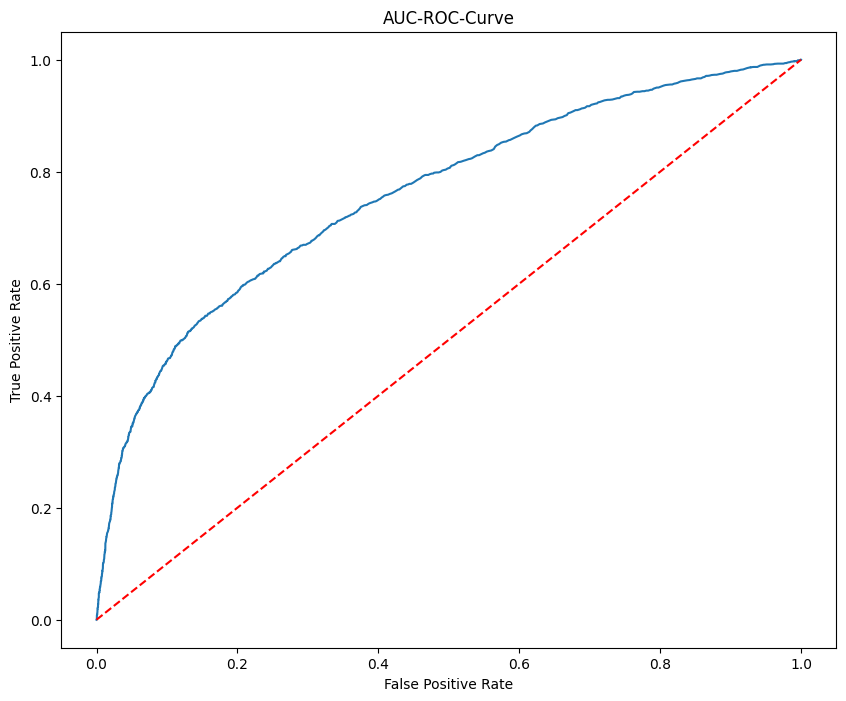

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("AUC-ROC-Curve")
plt.show()

In [47]:
input_data = (-1.1355123246073677,1,1,2,-1.244324652307965,0,-0.4849654557394294,-0.1478490176807232,-0.25530939085407756,-0.21036893766203657,-0.3073466366887242,-0.20631337304146,-0.29344381171848527)

# Reshape the input data to a 2D array with a single row
input_data_reshaped = np.reshape(input_data, (1, -1))

# Make a prediction on the reshaped input data
prediction = rf_random.predict(input_data_reshaped)

# Check the predicted value and print the corresponding label
if prediction[0] == 0:
    print('Not default')
else:
    print('Default')

Not default
